In [83]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import silhouette_score

In [3]:
# Called the first game of the season against RIT
Rit_game = pd.read_csv("WS \'22 Data Game 8.xlsx - RIT.csv")

In [4]:
#For my first try of my cluster analysis will be looking at the entire game which in split name is called game
Rit_full = Rit_game[Rit_game['Split Name']== 'game']

In [5]:
# Showed output of dataframe
Rit_full

,Session Title,Player Name,Minutes Played,Split Name,Tags,Distance (miles),Sprint Distance (yards),Player Name.1,Power Plays,Energy (kcal),...,Accelerations Zone Count: 0 - 1 m/s/s,Accelerations Zone Count: 1 - 2 m/s/s,Accelerations Zone Count: 2 - 3 m/s/s,Accelerations Zone Count: 3 - 4 m/s/s,Accelerations Zone Count: > 4 m/s/s,Deceleration Zone Count: 0 - 1 m/s/s,Deceleration Zone Count: 1 - 2 m/s/s,Deceleration Zone Count: 2 - 3 m/s/s,Deceleration Zone Count: 3 - 4 m/s/s,Deceleration Zone Count: > 4 m/s/s
0,RIT,C,41.0,game,game,3.0468,56.5484,C,19,541.2985,...,0,150,83,17,4,0,159,75,13,13
1,RIT,M,63.0,game,game,4.2545,372.7220,M,38,668.6663,...,0,184,89,22,5,0,163,95,40,16
2,RIT,B,40.0,game,game,3.1280,374.8578,B,27,546.7457,...,0,154,56,15,1,0,134,55,18,7
3,RIT,S,79.0,game,game,5.5505,217.8395,S,28,1009.7949,...,0,245,104,39,6,0,240,108,43,22
4,RIT,R,79.0,game,game,5.2853,268.4758,R,28,879.5842,...,0,204,91,29,4,0,205,73,42,18
5,RIT,O,21.0,game,game,1.2807,193.8413,O,16,188.6010,...,0,50,34,11,2,0,45,28,9,5
6,RIT,J,32.0,game,game,2.6522,132.1081,J,24,512.1373,...,0,94,64,17,2,0,96,51,22,3
7,RIT,G,59.0,game,game,4.2371,279.7345,G,38,701.9383,...,0,162,96,27,4,0,150,80,23,20
8,RIT,H,18.0,game,game,1.7317,158.4160,H,12,272.8884,...,0,69,29,4,1,0,63,24,13,2
9,RIT,E,38.0,game,game,3.0458,11.4862,E,4,596.7988,...,0,203,87,18,2,0,189,85,25,3


In [6]:
# Now time to cut the dataframe to the columns that fall under volume and intensity
Rit_volume_intensity = Rit_full[["Player Name", "Minutes Played", "Distance (miles)", "Sprint Distance (yards)", "Power Plays", "Energy (kcal)", "Impacts", "Top Speed (mph)","Distance Per Min (yd/min)", "Power Score (w/kg)", "Player Load", "Work Ratio"]]

In [7]:
#Show output of new dataframe with only volumne and intensity metrics
Rit_volume_intensity

,Player Name,Minutes Played,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,Top Speed (mph),Distance Per Min (yd/min),Power Score (w/kg),Player Load,Work Ratio
0,C,41.0,3.0468,56.5484,19,541.2985,0,13.7797,56.1596,3.9933,263.0864,25.4290
1,M,63.0,4.2545,372.7220,38,668.6663,1,14.4955,78.4206,5.5182,310.4929,29.5146
2,B,40.0,3.1280,374.8578,27,546.7457,0,15.9470,57.6579,4.0335,220.6685,23.9749
3,S,79.0,5.5505,217.8395,28,1009.7949,1,16.0116,102.3105,7.1256,370.2582,43.2579
4,R,79.0,5.2853,268.4758,28,879.5842,2,14.6446,97.4208,6.6917,341.1507,41.1692
5,O,21.0,1.2807,193.8413,16,188.6010,1,15.5593,23.6074,1.7006,108.0833,8.6859
6,J,32.0,2.6522,132.1081,24,512.1373,0,16.0564,48.8867,3.4159,187.4736,21.4530
7,G,59.0,4.2371,279.7345,38,701.9383,1,15.8675,78.0996,5.5125,296.4785,31.0781
8,H,18.0,1.7317,158.4160,12,272.8884,0,14.7639,31.9189,2.1782,166.7198,10.8854
9,E,38.0,3.0458,11.4862,4,596.7988,1,11.6918,56.1423,3.9268,237.9743,23.8532


In [8]:
# Checking for multico.
vif_data = pd.DataFrame()
vif_data['feature'] = Rit_cluster.columns
vif_data['VIF'] = [variance_inflation_factor(Rit_cluster.values, i) for i in range(len(Rit_cluster.columns))]


NameError: name 'Rit_cluster' is not defined

In [9]:
vif_data

""


In [10]:
#Start of Cluster Analysis with Minutes Played included

In [11]:
Rit_volume_intensity

,Player Name,Minutes Played,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,Top Speed (mph),Distance Per Min (yd/min),Power Score (w/kg),Player Load,Work Ratio
0,C,41.0,3.0468,56.5484,19,541.2985,0,13.7797,56.1596,3.9933,263.0864,25.4290
1,M,63.0,4.2545,372.7220,38,668.6663,1,14.4955,78.4206,5.5182,310.4929,29.5146
2,B,40.0,3.1280,374.8578,27,546.7457,0,15.9470,57.6579,4.0335,220.6685,23.9749
3,S,79.0,5.5505,217.8395,28,1009.7949,1,16.0116,102.3105,7.1256,370.2582,43.2579
4,R,79.0,5.2853,268.4758,28,879.5842,2,14.6446,97.4208,6.6917,341.1507,41.1692
5,O,21.0,1.2807,193.8413,16,188.6010,1,15.5593,23.6074,1.7006,108.0833,8.6859
6,J,32.0,2.6522,132.1081,24,512.1373,0,16.0564,48.8867,3.4159,187.4736,21.4530
7,G,59.0,4.2371,279.7345,38,701.9383,1,15.8675,78.0996,5.5125,296.4785,31.0781
8,H,18.0,1.7317,158.4160,12,272.8884,0,14.7639,31.9189,2.1782,166.7198,10.8854
9,E,38.0,3.0458,11.4862,4,596.7988,1,11.6918,56.1423,3.9268,237.9743,23.8532


In [12]:
#Rit_volume_intensity['Player Number'] = Rit_volume_intensity['Player Number'].astype('object')

In [13]:
#Rit_volume_intensity['Player name'] = Rit_volume_intensity['Player Name'].astype('int')

In [14]:
Rit_cluster = Rit_volume_intensity.loc[:, Rit_volume_intensity.columns != 'Player Name']

In [15]:
# Elbow method (figuring out how many clusters to use)
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

In [16]:
distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(Rit_cluster)
    distortions.append(kmeanModel.inertia_)



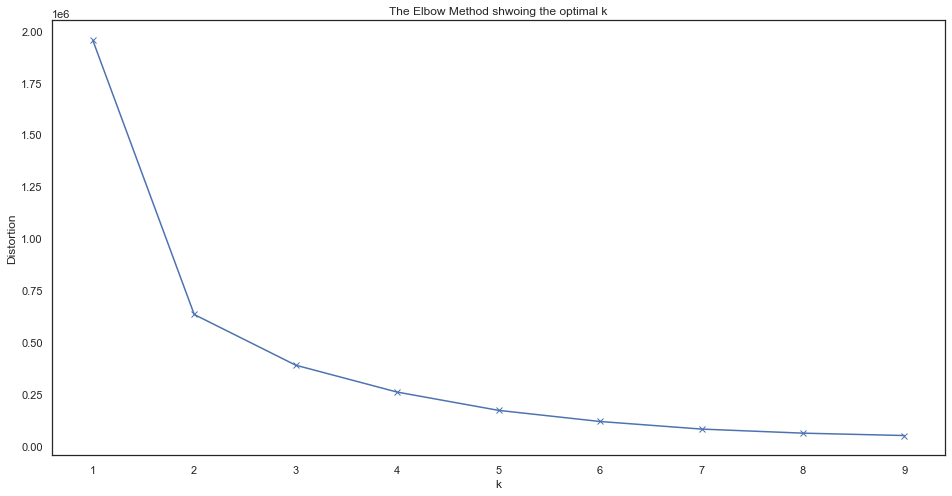

In [17]:
plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method shwoing the optimal k')
plt.show()

In [18]:
Rit_cluster

,Minutes Played,Distance (miles),Sprint Distance (yards),Power Plays,Energy (kcal),Impacts,Top Speed (mph),Distance Per Min (yd/min),Power Score (w/kg),Player Load,Work Ratio
0,41.0,3.0468,56.5484,19,541.2985,0,13.7797,56.1596,3.9933,263.0864,25.4290
1,63.0,4.2545,372.7220,38,668.6663,1,14.4955,78.4206,5.5182,310.4929,29.5146
2,40.0,3.1280,374.8578,27,546.7457,0,15.9470,57.6579,4.0335,220.6685,23.9749
3,79.0,5.5505,217.8395,28,1009.7949,1,16.0116,102.3105,7.1256,370.2582,43.2579
4,79.0,5.2853,268.4758,28,879.5842,2,14.6446,97.4208,6.6917,341.1507,41.1692
5,21.0,1.2807,193.8413,16,188.6010,1,15.5593,23.6074,1.7006,108.0833,8.6859
6,32.0,2.6522,132.1081,24,512.1373,0,16.0564,48.8867,3.4159,187.4736,21.4530
7,59.0,4.2371,279.7345,38,701.9383,1,15.8675,78.0996,5.5125,296.4785,31.0781
8,18.0,1.7317,158.4160,12,272.8884,0,14.7639,31.9189,2.1782,166.7198,10.8854
9,38.0,3.0458,11.4862,4,596.7988,1,11.6918,56.1423,3.9268,237.9743,23.8532


In [19]:
from sklearn import preprocessing


In [20]:
#Rit_cluster= Rit_cluster.fillna(Rit_cluster.mean())

In [21]:
Rit_cluster.dtypes

Minutes Played               float64
Distance (miles)             float64
Sprint Distance (yards)      float64
Power Plays                    int64
Energy (kcal)                float64
Impacts                        int64
Top Speed (mph)              float64
Distance Per Min (yd/min)    float64
Power Score (w/kg)           float64
Player Load                  float64
Work Ratio                   float64
dtype: object

In [22]:
#Normalize (standardize/rescale) the data.
#We want to normalize the data as variables are measured on different scales.

In [23]:
x = Rit_cluster.values

In [24]:
scaler = preprocessing.MinMaxScaler()

In [25]:
x_scaled = scaler.fit_transform(x)


In [26]:
X_norm = pd.DataFrame(x_scaled)

In [27]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2) # 2D PCA for the plot
reduced = pd.DataFrame(pca.fit_transform(X_norm))

In [28]:
reduced

,0,1
0,-0.281207,0.164416
1,0.534956,-0.171173
2,-0.001789,-0.598693
3,1.068855,0.179782
4,0.906708,0.343826
5,-1.023297,-0.395635
6,-0.376007,-0.319387
7,0.507695,-0.197016
8,-0.916591,-0.307016
9,-0.485594,0.686025


In [29]:
from sklearn.cluster import KMeans
# specify the number of clusters
kmeans = KMeans(n_clusters=3)
# fit the input data
kmeans = kmeans.fit(reduced)
# get the cluster labels
labels = kmeans.predict(reduced)
# centroid values
centroid = kmeans.cluster_centers_
# cluster values
clusters = kmeans.labels_.tolist()
# adding names
names = Rit_full['Player Name']

In [30]:
names

0      C
1      M
2     B 
3      S
4     R 
5      O
6      J
7     G 
8     H 
9      E
10    F 
11    K 
12     V
13     X
14     U
15     I
16    L 
17     N
18     P
Name: Player Name, dtype: object

In [31]:
reduced['cluster'] = clusters
reduced['names'] = names
reduced.columns = ['x', 'y', 'cluster', 'names']
reduced.head()


,x,y,cluster,names
0,-0.281207,0.164416,0,C
1,0.534956,-0.171173,1,M
2,-0.001789,-0.598693,1,B
3,1.068855,0.179782,2,S
4,0.906708,0.343826,2,R


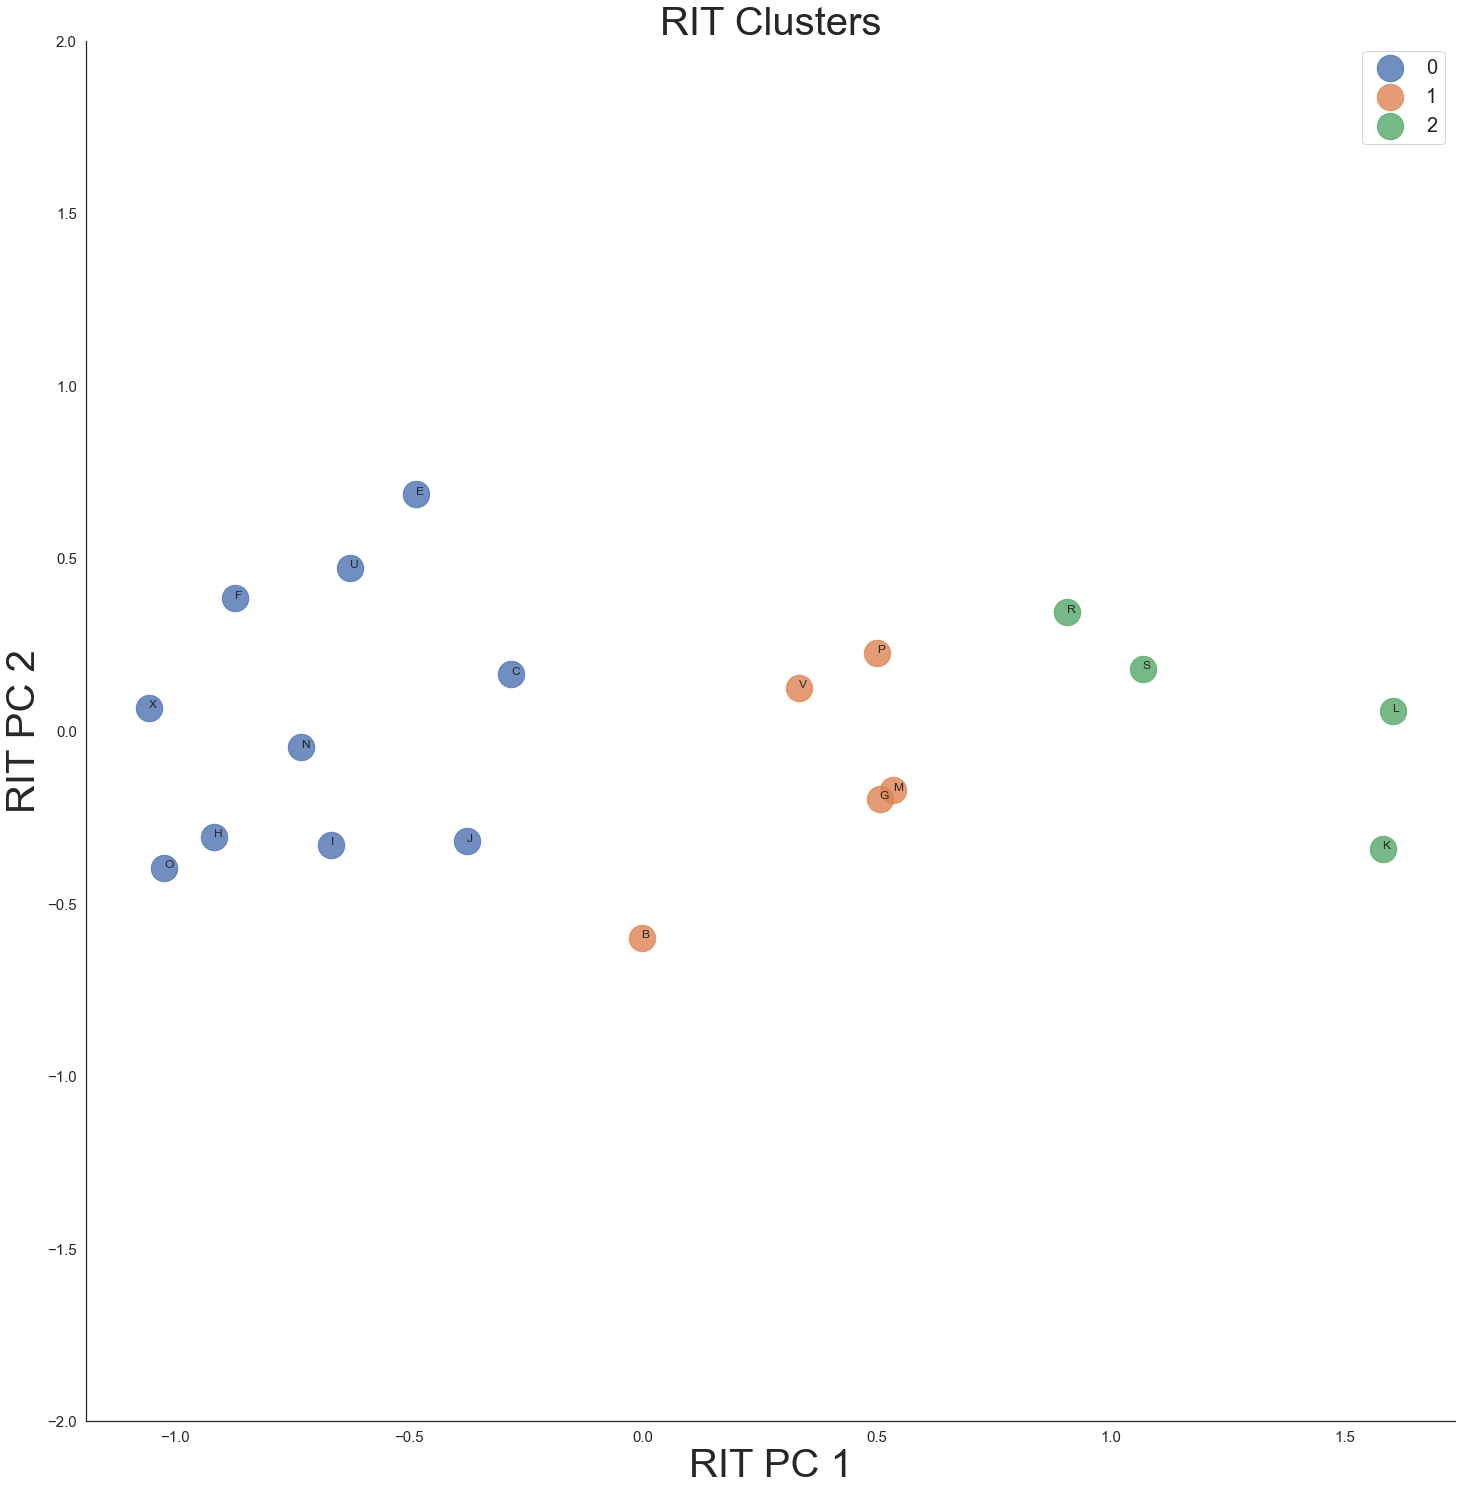

In [85]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set(style="white")
ax = sns.lmplot(x="x", y="y", hue='cluster', data = reduced, legend= False,
fit_reg=False, height = 20, scatter_kws={"s": 700})
texts = []
for x, y, s in zip(reduced.x, reduced.y, reduced.names):
    texts.append(plt.text(x, y, s))
ax.set(ylim=(-2, 2))
plt.tick_params(labelsize=15)
plt.xlabel("RIT PC 1", fontsize = 40)
plt.ylabel("RIT PC 2", fontsize = 40)
plt.title('RIT Clusters', fontsize=40)
plt.legend(fontsize = 20)
plt.show()

In [79]:
RIT_group_0 = reduced[(reduced['cluster'] == 0)]
RIT_group_0 

#There are five fowards O, J, H, I, N (5 out of 8)
#C(MF), O(F), J(F), H(F), E(MF), F(GK), X(GK), U(MF), I(F), N(F)

,x,y,cluster,names
0,-0.281207,0.164416,0,C
5,-1.023297,-0.395635,0,O
6,-0.376007,-0.319387,0,J
8,-0.916591,-0.307016,0,H
9,-0.485594,0.686025,0,E
10,-0.871585,0.384349,0,F
13,-1.057233,0.066924,0,X
14,-0.627058,0.472754,0,U
15,-0.667020,-0.329970,0,I
17,-0.730917,-0.047682,0,N


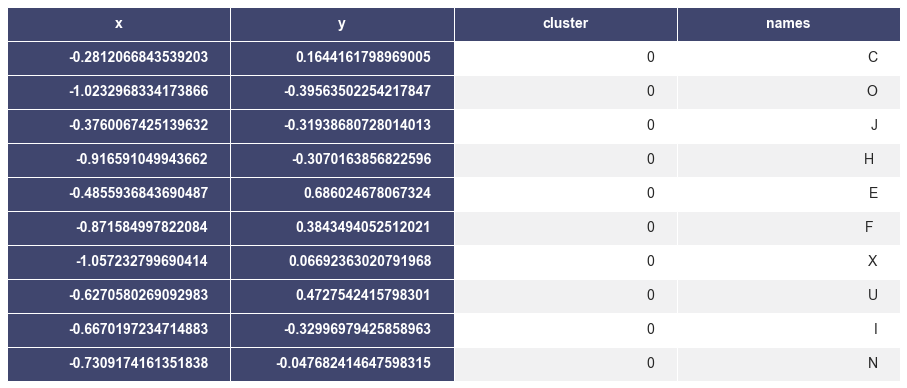

In [97]:
import six

df = RIT_group_0


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)

In [86]:
RIT_group_0.to_csv('RIT_group_0.csv')

In [81]:
RIT_group_1 = reduced[(reduced['cluster'] == 1)]
RIT_group_1 
#There are 1 midfielder V (1 out of 5)
# M(D), B(F), G(F), V(MF), P(F)

,x,y,cluster,names
1,0.534956,-0.171173,1,M
2,-0.001789,-0.598693,1,B
7,0.507695,-0.197016,1,G
12,0.333677,0.125809,1,V
18,0.500049,0.226901,1,P


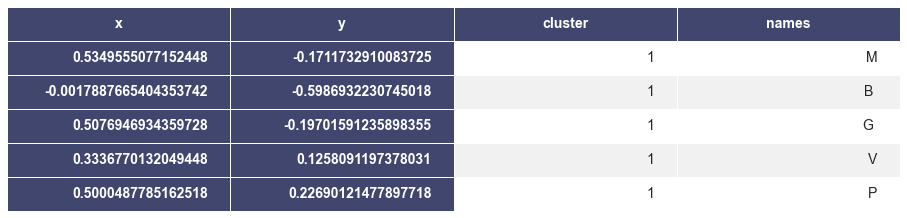

In [98]:
df = RIT_group_1


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)

In [82]:
RIT_group_2 = reduced[(reduced['cluster'] == 2)]
RIT_group_2 
#There are 3 defenders R, K, L (3 out of 4)
#S(MF), R(D), K(D), L(D)

,x,y,cluster,names
3,1.068855,0.179782,2,S
4,0.906708,0.343826,2,R
11,1.582566,-0.341346,2,K
16,1.603792,0.057132,2,L


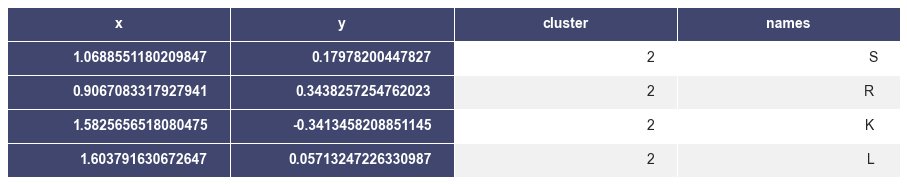

In [99]:
df = RIT_group_2


def render_mpl_table(data, col_width=3.0, row_height=0.625, font_size=14,
                     header_color='#40466e', row_colors=['#f1f1f2', 'w'], edge_color='w',
                     bbox=[0, 0, 1, 1], header_columns=0,
                     ax=None, **kwargs):
    if ax is None:
        size = (np.array(data.shape[::-1]) + np.array([0, 1])) * np.array([col_width, row_height])
        fig, ax = plt.subplots(figsize=size)
        ax.axis('off')

    mpl_table = ax.table(cellText=data.values, bbox=bbox, colLabels=data.columns, **kwargs)

    mpl_table.auto_set_font_size(False)
    mpl_table.set_fontsize(font_size)

    for k, cell in  six.iteritems(mpl_table._cells):
        cell.set_edgecolor(edge_color)
        if k[0] == 0 or k[1] < header_columns:
            cell.set_text_props(weight='bold', color='w')
            cell.set_facecolor(header_color)
        else:
            cell.set_facecolor(row_colors[k[0]%len(row_colors) ])
    return ax

render_mpl_table(df, header_columns= 2, col_width=4)